Noisy Image


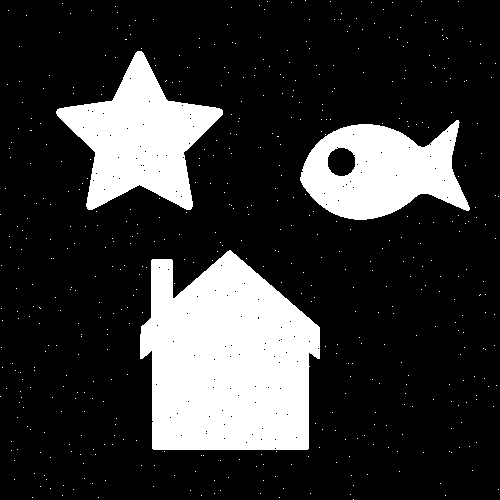

Denoised image


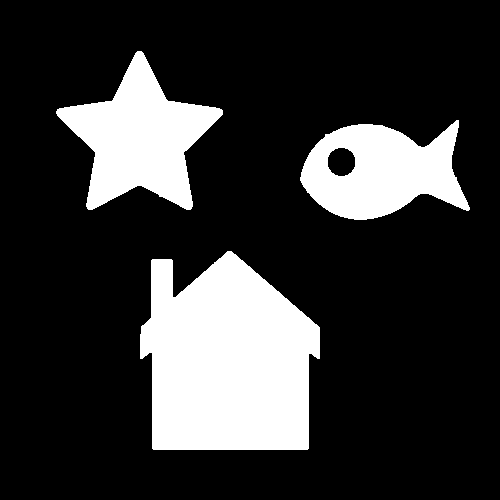

Boundary of the image


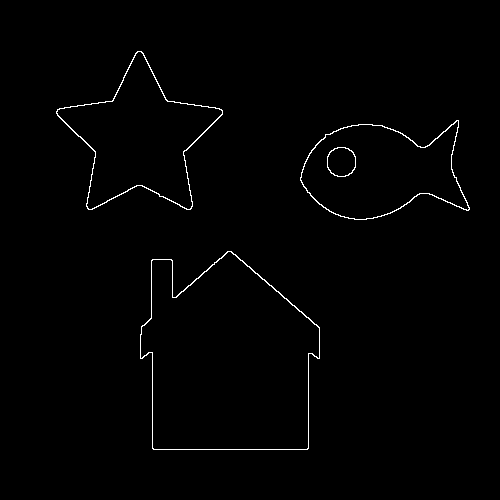

In [3]:
"""

(i) implement four commonly used morphology operations: erosion, dilation, open and close. 
    The stucturing element (SE) should be a 3x3 square of all 1's for all the operations.
(ii) remove noises in task3.png using proper combination of the above morphology operations. 
(iii) extract the boundaries of the objects in denoised binary image 
      using proper combination of the above morphology operations. 


"""
from google.colab.patches import cv2_imshow
from cv2 import imread, imwrite, imshow, IMREAD_GRAYSCALE, namedWindow, waitKey, destroyAllWindows
import numpy as np
kernel = np.full(shape=(3, 3), fill_value=1)
def morph_erode(img):
    """
    :param img: numpy.ndarray(int or bool), image
    :return erode_img: numpy.ndarray(int or bool), image, same size as the input image

    Apply mophology erosion on input binary image. 
    Use 3x3 squared structuring element of all 1's. 
    """
    img_1=img/255
    padded_img = np.pad(img_1, (1,1), 'constant')
    sub_array=[]
    for i in range(padded_img.shape[0] - 2) :
      for j in range(padded_img.shape[1] - 2):
          sub_array.append(padded_img[i:i+3, j:j+3])
              
    erode_img=[]
    for i in sub_array:
      if i.all()==kernel.all():
        erode_img.append(255)
      else:
        erode_img.append(0)
    
    erode_img = np.array(erode_img).reshape(img.shape)
    # cv2_imshow(img)
    # cv2_imshow(erode_img)
    # TO DO: implement your solution here
    # raise NotImplementedError
    return erode_img


def morph_dilate(img):
    """
    :param img: numpy.ndarray(int or bool), image
    :return dilate_img: numpy.ndarray(int or bool), image, same size as the input image

    Apply mophology dilation on input binary image. 
    Use 3x3 squared structuring element of all 1's. 
    """
    img_1=img/255
    padded_img = np.pad(img_1, (1,1), 'constant')
    sub_array=[]
    for i in range(padded_img.shape[0] - 2) :
      for j in range(padded_img.shape[1] - 2):
          sub_array.append(padded_img[i:i+3, j:j+3])
              
    dilate_img=[]
    for i in sub_array:
      if i.any()==kernel.any():
        dilate_img.append(255)
      else:
        dilate_img.append(0)
    
    dilate_img = np.array(dilate_img).reshape(img.shape)
    # TO DO: implement your solution here
    # raise NotImplementedError
    return dilate_img


def morph_open(img):
    """
    :param img: numpy.ndarray(int or bool), image
    :return open_img: numpy.ndarray(int or bool), image, same size as the input image

    Apply mophology opening on input binary image. 
    Use 3x3 squared structuring element of all 1's. 
    You can use the combination of above morph_erode/dilate functions for this. 
    """
    eroded_img=morph_erode(img)
    open_img=morph_dilate(eroded_img)
    # TO DO: implement your solution here
    # raise NotImplementedError
    return open_img


def morph_close(img):
    """
    :param img: numpy.ndarray(int or bool), image
    :return close_img: numpy.ndarray(int or bool), image, same size as the input image

    Apply mophology closing on input binary image. 
    Use 3x3 squared structuring element of all 1's. 
    You can use the combination of above morph_erode/dilate functions for this. 
    """
    dilated_img=morph_dilate(img)
    close_img=morph_erode(dilated_img)
    
    # TO DO: implement your solution here
    # raise NotImplementedError
    return close_img


def denoise(img):
    """
    :param img: numpy.ndarray(int), image
    :return denoise_img: numpy.ndarray(int), image, same size as the input image

    Remove noises from binary image using morphology operations. 
    If you convert the dtype of input binary image from int to bool,
    make sure to convert the dtype of returned image back to int.
    """
    print("Noisy Image")
    cv2_imshow(img)
    closed_img=morph_close(img)
    denoise_img=morph_open(closed_img)
    print("Denoised image")
    cv2_imshow(denoise_img)
    # TO DO: implement your solution here
    # raise NotImplementedError
    return denoise_img


def boundary(img):
    """
    :param img: numpy.ndarray(int), image
    :return denoise_img: numpy.ndarray(int), image, same size as the input image

    Extract boundaries from binary image using morphology operations. 
    If you convert the dtype of input binary image from int to bool,
    make sure to convert the dtype of returned image back to int.
    """
    bound_img=img-morph_erode(img)
    print("Boundary of the image")
    cv2_imshow(bound_img)
    # TO DO: implement your solution here
    # raise NotImplementedError
    return bound_img


if __name__ == "__main__":
    img = imread('task3.png', IMREAD_GRAYSCALE)
    denoise_img = denoise(img)
    imwrite('results/task3_denoise.jpg', denoise_img)
    bound_img = boundary(denoise_img)
    imwrite('results/task3_boundary.jpg', bound_img)





